# **$\bullet$ Regresión**

Pregunta 1: modelo de regresión lineal
----

Como bien dice el enunciado, el modelo de la regresión lineal es: 

$$\hat{y} = \sum_{i=1}^p a_i g_i(\boldsymbol{x}) + \sum_{i=p+1}^k b_{i-p} g_i(\boldsymbol{x})
$$

donde $\hat{y}$ es la predicción del modelo, $\boldsymbol{x}$ son los inputs de los datos, $g_i(\boldsymbol{x})$ son las funciones del modelo, $a_i$ son los $p$ primeros parametros que siguen el prior normal y por ultimo tenemos a $b_i$ que representa los siguientes $k-p$ parametros que siguen un priuor de Laplace.

Como también es mencionado en el enunciado podemos asumir que las mediciones de los valores observados, es decir $y_i$, contienen un error normal, lo que lleva a estimar que el modelo describe la relación entre $y_i$ e $\hat{y}_i$ se escribe como:

$$y_i \sim \mathcal{N}(\hat{y}_i, \sigma^2)
$$

Por lo que el likelihood para N observaciones está descrito como:

$$p(\{y_i\}|\{x_i\}, \boldsymbol{\theta}) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( - \frac{(y_i - \hat{y}_i)^2}{2\sigma^2} \right)$$

Donde $\hat{y}_i$ es la prediccion del modelo para la observación $i$, y $\theta$ representa los parametros del modelo, Ahora sacando el logaritmo y reordenando terminos tenemos:

$$\log p(\{y_i\}|\{x_i\}, \boldsymbol{\theta}) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Ahora para los primeros $p$ parámetros $\{a_i\}_{i=1}^p$, asumimos un prior normal con media 0 y varianza $\tau^2$:

$$a_i \sim \mathcal{N}(0, \tau^2)
$$

Por lo que 

$$p(\{a_i\}) = \prod_{i=1}^{p} \mathcal{N}(a_i \mid 0, \tau^2) = \prod_{i=1}^{p} \frac{1}{\sqrt{2\pi \tau^2}} \exp\left( - \frac{a_i^2}{2 \tau^2} \right)$$ \\
$$ \log p(\{a_i\}) = -\frac{p}{2} \log(2\pi\tau^2) - \sum_{i=1}^{p} \frac{a_i^2}{2\tau^2}
$$

de diferente manera tenemos que $\{b_i\}_{i=1}^{k-p}$, el prior es una distribución de Laplace con parámetro $\lambda$, cuya densidad es:

$$p(b_i) = \frac{\lambda}{2} \exp(-\lambda |b_i|)
$$

Por lo tanto, el log del prior es:

$$\log p(\{b_i\}) = (k-p) \log\left(\frac{\lambda}{2}\right) - \lambda \sum_{i=1}^{k-p} |b_i|$$

El siguiente paso es calcular el posterior el cual combina el likelihood y los priors mediante la regla de Bayes:

$$p(\boldsymbol{\theta}|\{y_i\}, \{x_i\}) \propto p(\{y_i\}|\{x_i\}, \boldsymbol{\theta}) \cdot p(\boldsymbol{\theta})
$$

Donde $p(\boldsymbol{\theta}) = p(\{a_i\}) \cdot p(\{b_i\})$. El logaritmo del posterior es:

$$\log p(\boldsymbol{\theta}|\{y_i\}, \{x_i\}) = \log p(\{y_i\}|\{x_i\}, \boldsymbol{\theta}) + \log p(\boldsymbol{\theta})
$$

Sustituimos

$$\log p(\boldsymbol{\theta}|\{y_i\}, \{x_i\}) = -\frac{N}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 
- \sum_{i=1}^{p} \frac{a_i^2}{2\tau^2} - \lambda \sum_{i=1}^{k-p} |b_i|$$

Finalmente para encontrar el estimador MAP, debemos maximizar el log-posterior, lo cual es equivalente a minimizar el negativo del log-posterior. Entonces, la función que queremos minimizar es:

$$L(\boldsymbol{\theta}) = \frac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \sum_{i=1}^{p} \frac{a_i^2}{2\tau^2} + \lambda \sum_{i=1}^{k-p} |b_i|
$$

Esta función tiene tres componentes:

$\bullet$ El primer término representa el ajuste del modelo a los datos (el término de error cuadrático).
    
$\bullet$ El segundo término es la penalización $L_2$ para los parámetros $a_i$, impuesta por el prior normal.
    
$\bullet$ El tercer término es la penalización $L_1$ para los parámetros $b_i$, impuesta por el prior de Laplace.


Pregunta 2
====

pregunta 2.1
-----

Aquí se nos pide calcular las derivadas analíticas de la función de costo con respecto a los parámetros $\theta_i$.
La función de costo que obtuvimos en la Pregunta 1 es:

$$L(\theta) = \frac{1}{2 \sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \frac{1}{2 \tau^2} \sum_{i=1}^{p} a_i^2 + \lambda \sum_{i=1}^{k-p} |b_i|$$

**Derivada con respecto a $a_i$ (los primeros $p$ parámetros con prior normal):**

Para los parámetros $a_i$ (con prior normal), necesitamos derivar el término cuadrático correspondiente en la función de costo:


El término de error cuadrático con respecto a $a_i$ (del primer sumatorio):
$$\frac{\partial}{\partial a_i} \left[ \frac{1}{2 \sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right] = -\frac{1}{\sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i) \cdot g_i(x)$$



El término $L_2$ con respecto a $a_i$ (penalización del prior normal):
$$\frac{\partial}{\partial a_i} \left[ \frac{1}{2 \tau^2} \sum_{i=1}^{p} a_i^2 \right] = \frac{a_i}{\tau^2}$$

Por lo tanto, la derivada total con respecto a $a_i$ es:


$$\frac{\partial L}{\partial a_i} = -\frac{1}{\sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i) \cdot g_i(x) + \frac{a_i}{\tau^2}$$

**Derivada con respecto a $b_i$ (los $k-p$ parámetros con prior de Laplace):**

Para los parámetros $b_i$ (con prior de Laplace), necesitamos derivar el término de penalización absoluta:

El término de error cuadrático con respecto a $b_i$:


$$\frac{\partial}{\partial b_i} \left[ \frac{1}{2 \sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right] = -\frac{1}{\sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i) \cdot g_i(x)$$

considerando que: 

$$\text{sign}(b_i) = 
\begin{cases} 
1 & \text{si } b_i > 0 \\ 
0 & \text{si } b_i = 0 \\ 
-1 & \text{si } b_i < 0 
\end{cases}$$

El término $L_1$ con respecto a $b_i$ (penalización del prior Laplace):

$$\frac{\partial}{\partial b_i} \left[ \lambda \sum_{i=1}^{k-p} |b_i| \right] = \lambda \cdot \text{sign}(b_i)$$

Por lo tanto, la derivada total con respecto a $b_i$ es:


$$\frac{\partial L}{\partial b_i} = -\frac{1}{\sigma^2} \sum_{i=1}^{N} (y_i - \hat{y}_i) \cdot g_i(x) + \lambda \cdot \text{sign}(b_i)$$



pregunta 2.2
-----

Dado el problema de regresión lineal, partimos de la siguiente función de predicción:

$$
\hat{y} = \sum_{i=1}^p a_i g_i(\boldsymbol{x}) + \sum_{i=p+1}^k b_{i-p} g_i(\boldsymbol{x})
$$

donde:

$\bullet$\$a_i$ son los primeros $p$ parámetros con un prior normal

$\bullet$$b_i$ son los siguientes $k-p$ parámetros con un prior Laplace

Es imporante considerar que la función de costo está formada por dos términos: uno que mide el error cuadrático entre las predicciones y los valores observados $y_i$, y otro que es el término de regularización que proviene del prior Laplace. Esto nos da la siguiente función de costo:

$$
L(b_m) = \frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \lambda |b_m|
$$

donde:

$\bullet$ $y_i$ son los valores observados

$\bullet$ $\hat{y}_i = \sum_{j=1}^p a_j g_j(\boldsymbol{x}_i) + \sum_{j=p+1}^k b_{j-p} g_j(\boldsymbol{x}_i)$ es la predicción

$\bullet$ $\lambda$ es el parámetro de regularización asociado al prior Laplace

$\bullet$ $\sigma^2$ es la varianza del ruido

Queremos calcular la derivada de la función de costo respecto a los parámetros $b_m$ que tienen prior Laplace. Para eso, aplicamos diferencias finitas, usando la fórmula:

$$
\frac{\partial L}{\partial b_m} \approx \frac{L(b_m + h) - L(b_m)}{h}
$$

Debemos calcular la función de costo cuando se hace un pequeño cambio en el valor de $b_m$, esto nos da:

$$
L(b_m + h) = \frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - \hat{y}_i')^2 + \lambda |b_m + h|
$$

donde $\hat{y}_i'$ es la nueva predicción después de modificar $b_m$ por $b_m + h$, dada por:

$$
\hat{y}_i' = \sum_{j=1}^p a_j g_j(\boldsymbol{x}_i) + \sum_{j=p+1}^k (b_{j-p} + h \cdot \delta_{mj}) g_j(\boldsymbol{x}_i)
$$

Aquí $\delta_{mj}$ es la delta de Kronecker, que selecciona el término correspondiente a $b_m$.

El término regularizador $\lambda |b_m + h|$ depende del signo de $b_m + h$. Esto nos da dos casos:

$$
|b_m + h| = 
\begin{cases} 
b_m + h & \text{si } b_m + h > 0 \\
-(b_m + h) & \text{si } b_m + h < 0
\end{cases}
$$

Finalmente, la derivada aproximada de la función de costo respecto a $b_m$ es:

$$
\frac{\partial L}{\partial b_m} \approx \frac{L(b_m + h) - L(b_m)}{h}
$$

Ahora que tenemos la expresión para la derivada, aplicamos el método de gradiente descendente para ajustar los parámetros $b_m$. La regla de actualización para el gradiente descendente es:

$$
b_m^{t+1} = b_m^t - \alpha \nabla_{b_m} L(b_m^t)
$$

donde:

$\bullet$ $b_m^t$ es el valor de $b_m$ en la iteración $t$

$\bullet$ $\alpha$ es la tasa de aprendizaje

$\bullet$ $\nabla_{b_m} L(b_m^t)$ es el gradiente calculado en la iteración $t$

El gradiente de la función de costo respecto a $b_m$ es:

$$
\nabla_{b_m} L(b_m^t) = -\frac{1}{\sigma^2} \sum_{i=1}^N (y_i - \hat{y}_i) g_m(\boldsymbol{x}_i) + \lambda \, \text{sign}(b_m^t)
$$

donde $\text{sign}(b_m^t)$ es la función signo, definida como:

$$
\text{sign}(b_m^t) =
\begin{cases} 
1 & \text{si } b_m^t > 0 \\
-1 & \text{si } b_m^t < 0 \\
0 & \text{si } b_m^t = 0
\end{cases}
$$

Cada iteración del gradiente descendente actualiza el valor de $b_m$ siguiendo la regla mencionada hasta que se alcance un criterio de convergencia.

#He de mencionar que en algunos puntos me basé en "An Introduction to Statistical Learning" para la teoria del ejercicio.

In [34]:
import numpy as np #como se mencionó en el enunciado, solo podemos ocupar las librerias especificadas

np.random.seed(0)  # para reproducibilidad
N = 100  # cantidad de muestras
p = 5    # parámetros para a
k = 10   # total de parámetros (a + b)

X = np.random.randn(N, k)  # matriz de diseño
true_a = np.random.randn(p) # parametros verdaderos para a
true_b = np.random.randn(k - p)  # parametros verdaderos para b
y = X @ np.hstack([true_a, true_b]) + np.random.normal(0, 1, N)  # Valores de salida con ruido

# Función de costo (log-posterior negativo) para los parametros a y b
def loss_function(a, b, X, y, sigma2, tau2, lamb):
    # Predicción del modelo
    y_hat = X @ np.hstack([a, b])
    
    # término de error cuadrático
    error_term = (1 / (2 * sigma2)) * np.sum((y - y_hat) ** 2)
    
    # penalización L2 para los parámetros a (prior normal)
    l2_penalty = np.sum(a ** 2) / (2 * tau2)
    
    # penalización L1 para los parámetros b (prior de Laplace)
    l1_penalty = lamb * np.sum(np.abs(b))
    
    return error_term + l2_penalty + l1_penalty

# derivada numerica usando diferencias fintas
def numerical_derivative(f, b, h=1e-5):#h tiene que ser un valor pequeño
    grad = np.zeros_like(b)
    for i in range(len(b)):
        b_plus_h = b.copy()
        b_plus_h[i] += h
        grad[i] = (f(b_plus_h) - f(b)) / h
    return grad

# función para gradiente descendente
def gradient_descent(X, y, a_init, b_init, sigma2, tau2, lamb, alpha, num_iters):
    a = a_init.copy()
    b = b_init.copy()
    
    for i in range(num_iters):
        # calcular gradiente con respecto a y b
        grad_a = - (1 / sigma2) * (X.T @ (y - X @ np.hstack([a, b])))[:len(a)] + a / tau2
        grad_b = numerical_derivative(lambda b: loss_function(a, b, X, y, sigma2, tau2, lamb), b)
        
        # actualizar parametros
        a -= alpha * grad_a
        b -= alpha * grad_b
    
    return a, b

# parámetros iniciales
a_init = np.random.randn(p)
b_init = np.random.randn(k - p)

# ejecutar gradiente descendente
a_opt, b_opt = gradient_descent(X, y, a_init, b_init, sigma2=1.0, tau2=1.0, lamb=0.1, alpha=0.01, num_iters=1000)

print("Parametros optimos a:", a_opt)
print("Parametros optimos b:", b_opt)


Parametros optimos a: [ 0.59864694  0.82190475 -0.44342301  0.12308208  0.28388835]
Parametros optimos b: [ 0.26676082  0.53209744 -1.83857671 -0.14342893  0.28260438]


Parte 2
====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1000 non-null   int64  
 1   mjd             1000 non-null   int64  
 2   z               1000 non-null   float64
 3   zErr            1000 non-null   float64
 4   zWarning        1000 non-null   int64  
 5   cx              1000 non-null   float64
 6   cy              1000 non-null   float64
 7   cz              1000 non-null   float64
 8   sciencePrimary  1000 non-null   int64  
 9   legacyPrimary   1000 non-null   int64  
 10  seguePrimary    1000 non-null   int64  
 11  segue1Primary   1000 non-null   int64  
 12  segue2Primary   1000 non-null   int64  
 13  bossPrimary     1000 non-null   int64  
 14  sdssPrimary     1000 non-null   int64  
 15  objID           1000 non-null   int64  
 16  mode            1000 non-null   int64  
 17  nChild          1000 non-null   in

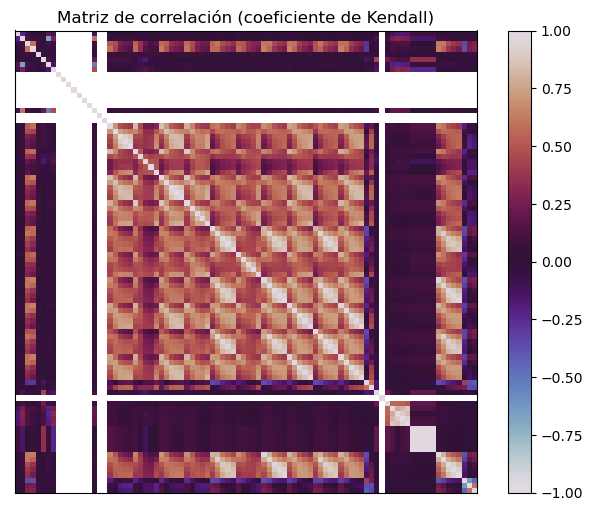

In [35]:
# Importar librerías necesarias (ahora si puedo ocupar las librerias que quiera)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import label_binarize

# cargar los datos de entrenamiento
df = pd.read_csv("GZ_mini_challenge_train.csv")

# verificar valores nulos y tipos de datos
df.info()

# calcular la matriz de correlación usando el método Kendall
corr_matrix = df.corr(method="kendall")

# visualizar la matriz de correlación
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='twilight', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks([])  # eliminar los "ticks" del eje x
ax.set_yticks([])  # eliminar los "ticks" del eje x
plt.title("Matriz de correlación (coeficiente de Kendall)")
plt.show()

In [36]:
# obtener las correlaciones
label_corr = corr_matrix['label']

# filtrar columnas con |correlación| > 0.08 para seleccionar características relevantes
high_corr_columns = label_corr[label_corr.abs() >= 0.08]

# mostrar las características seleccionadas
print(f"características con alta correlación con 'label': ({len(high_corr_columns)})")
print(high_corr_columns)

características con alta correlación con 'label': (48)
z                 0.271423
zErr              0.287450
psfMag_u          0.081185
psfMag_r         -0.147525
psfMag_i         -0.172077
psfMag_z         -0.180183
psfMagErr_u       0.083814
psfMagErr_r      -0.135739
psfMagErr_i      -0.146656
psfMagErr_z      -0.212535
fiberMag_u        0.138927
fiberMag_r       -0.086257
fiberMag_i       -0.103185
fiberMag_z       -0.116731
fiberMagErr_u     0.122279
fiberMagErr_r    -0.150264
fiberMagErr_i    -0.166256
fiberMagErr_z    -0.166457
petroMag_u        0.265758
petroMag_g        0.237986
petroMag_r        0.136579
petroMag_i        0.092691
petroMagErr_u     0.166647
petroMagErr_i    -0.121122
petroMagErr_z    -0.157549
modelMag_u        0.269271
modelMag_g        0.225337
modelMag_r        0.125116
modelMag_i        0.089112
modelMagErr_u     0.199340
modelMagErr_g     0.124604
modelMagErr_z    -0.082566
cModelMag_u       0.253739
cModelMag_g       0.239623
cModelMag_r       0.142066


In [37]:
# seleccionar las características con alta correlación
mini_df = df[high_corr_columns.index]

# filtrar por clase 'label' != 3 ya que no se nos pide a la hora de clasificar, además solo hay 3 y tendría que aplicar un balanceo exesivo, que no estoy seguro si funcionaría bien
mini_df = mini_df[mini_df['label'] != 3]

# escalamiento de los datos
features = mini_df.drop(columns=['label', 'p_cs', 'p_el'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# aplicar smote para balancear las clases "https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/"
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, mini_df['label'].values)

# ajustar el número de componentes PCA
pca = PCA(n_components=20)  # Ajustamos a 20 componentes
X_pca = pca.fit_transform(X_res)

# dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=42, stratify=y_res)

print(f"Dimensiones reducidas: {X_pca.shape}")

unique_classes, class_counts = np.unique(y_res, return_counts=True)
print(f"Clases únicas: {unique_classes}")
print(f"Conteo de cada clase: {class_counts}")


Dimensiones reducidas: (2025, 20)
Clases únicas: [0 1 2]
Conteo de cada clase: [675 675 675]


In [38]:
#Mi idea es basicamente juntar 2 modelos y generar un ensamblado de estos 2 y que este clasifique

# ajuste del modelo randomforest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42, class_weight='balanced')

# ajuste del modelo catboost
cb_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, class_weights=[1, 1, 1])

# ensamble usando votación por probabilidades
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('cb', cb_model)], voting='soft')

# entrenar el modelo Voting
voting_clf.fit(X_train, y_train)

# evaluar el modelo ensamblado en el conjunto de prueba
y_pred = voting_clf.predict(X_test)
f1_ensamblado = f1_score(y_test, y_pred, average='macro')

print(f"F1-score del modelo de ensamblado en test: {f1_ensamblado:.4f}")


F1-score del modelo de ensamblado en test: 0.8933


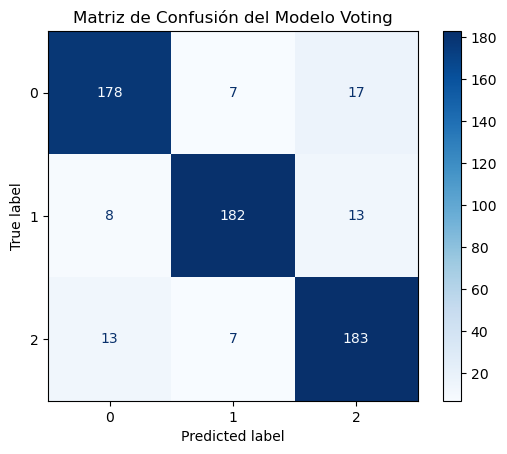

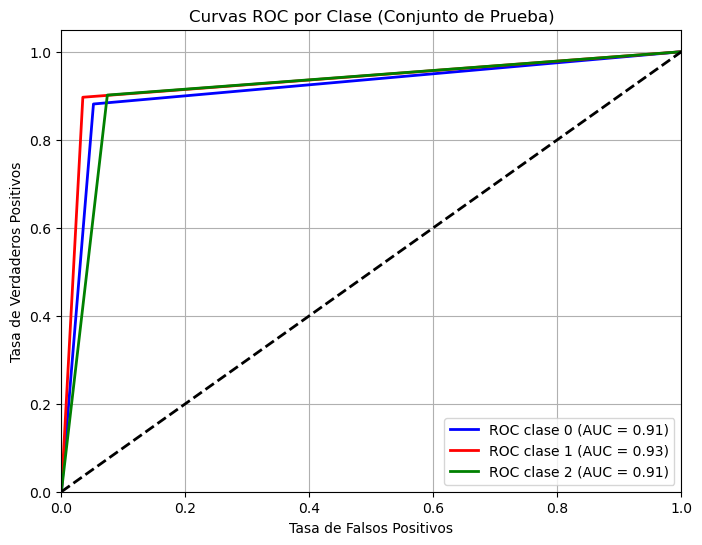

In [39]:
# Evaluar la matriz de confusión en conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Matriz de Confusión del Modelo Voting")
plt.show()

# Calcular curvas ROC y AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar curvas ROC
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase (Conjunto de Prueba)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [40]:
test_data = pd.read_csv("GZ_mini_challenge_test.csv")

# seleccionar las mismas características del conjunto de prueba
X_test_final = test_data[features.columns]
# rscalar el conjunto de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test_final)
# aplicar la transformación PCA al conjunto de prueba
X_test_pca = pca.transform(X_test_scaled)

# hacer predicciones utilizando el modelo de ensamblado entrenado
test_predictions = voting_clf.predict(X_test_pca)

# crear un dataFrame con las predicciones
predicted_df = pd.DataFrame({'ID': test_data['ID'], 'label': test_predictions})
# guardar las predicciones en un archivo cvs
predicted_df.to_csv('predicted(2try).csv', index=False)
print("las predicciones han sido gloriosamente guardadas en 'predicted(2try).csv'")

las predicciones han sido gloriosamente guardadas en 'predicted(2try).csv'


Pregunta extra
====

B1
====

Para demostrar que 
$$
p(\theta \mid \{x_i, y_i\}_{i=1}^N, \mu_\theta, C_\theta, C) \sim N(\theta \mid \mu_N, C_N),
$$
partimos de la ley de Bayes:
$$
p(\theta \mid \{x_i, y_i\}_{i=1}^N, \mu_\theta, C_\theta, C) \propto p(\{y_i\} \mid \{x_i\}, \theta, C) p(\theta \mid \mu_\theta, C_\theta).
$$

Sabemos que:
$$
p(\{y_i\} \mid \{x_i\}, \theta, C) = \prod_{i=1}^N N(y_i \mid f(x_i; \theta), \sigma_i^2),
$$
donde 
$$
f(x_i; \theta) = \sum_{i=1}^k \theta_i g_i(x) = M\theta.
$$

El likelihood es:
$$
p(\{y_i\} \mid \{x_i\}, \theta, C) \propto \exp\left(-\frac{1}{2}(Y - M\theta)^T C^{-1} (Y - M\theta)\right),
$$
donde $C$ es la matriz diagonal con  $\sigma_i^2$ en las entradas correspondientes.

El prior para $\theta$ es:
$$
p(\theta \mid \mu_\theta, C_\theta) \propto \exp\left(-\frac{1}{2}(\theta - \mu_\theta)^T C_\theta^{-1} (\theta - \mu_\theta)\right).
$$

Multiplicamos el likelihood por el prior:
$$
p(\theta \mid \{x_i, y_i\}, \mu_\theta, C_\theta, C) \propto \exp\left(-\frac{1}{2}\left[(Y - M\theta)^T C^{-1} (Y - M\theta) + (\theta - \mu_\theta)^T C_\theta^{-1} (\theta - \mu_\theta)\right]\right).
$$

Desarrollando los términos y agrupando en una forma cuadrática en $\theta$, obtenemos:
$$
p(\theta \mid \{x_i, y_i\}, \mu_\theta, C_\theta, C) \propto \exp\left(-\frac{1}{2}\left[\theta^T (M^T C^{-1} M + C_\theta^{-1}) \theta - 2\theta^T (M^T C^{-1} Y + C_\theta^{-1} \mu_\theta)\right]\right).
$$

Comparando esta expresión con la forma de una distribución normal, identificamos los siguientes términos:
$$
C_N = (M^T C^{-1} M + C_\theta^{-1})^{-1},
$$
$$
\mu_N = C_N (M^T C^{-1} Y + C_\theta^{-1} \mu_\theta).
$$

Esto demuestra que:
$$
p(\theta \mid \{x_i, y_i\}, \mu_\theta, C_\theta, C) \sim N(\theta \mid \mu_N, C_N).
$$


B2
====

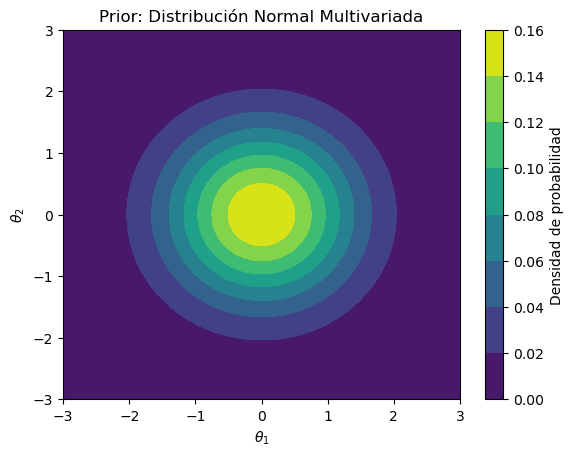

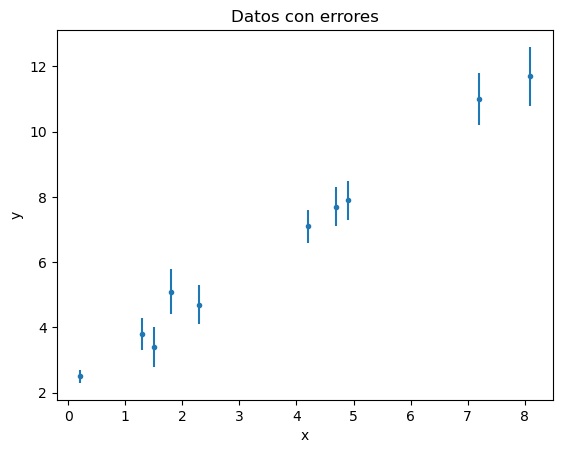

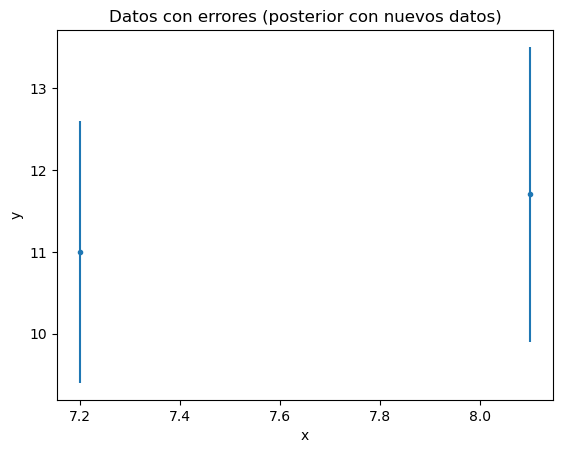

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

####################### Parte 1: graficar el prioor##############################
mu_theta = np.array([0, 0])
C_theta = np.array([[1, 0], [0, 1]])

# Crear una cuadrícula de valores de theta1 y theta2
theta1, theta2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((theta1, theta2))

# Distribución normal multivarada para el prior
prior = multivariate_normal(mean=mu_theta, cov=C_theta)

# Graficar prior
plt.contourf(theta1, theta2, prior.pdf(pos), cmap="viridis")
plt.title("Prior: Distribución Normal Multivariada")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.colorbar(label="Densidad de probabilidad")
plt.show()

############################## Parte 2: Graficar el posterior usando los primeros datos##############################
x = np.array([0.2, 1.3, 1.5, 1.8, 2.3, 4.2, 4.7, 4.9, 7.2, 8.1])
y = np.array([2.5, 3.8, 3.4, 5.1, 4.7, 7.1, 7.7, 7.9, 11, 11.7])
e = np.array([0.2, 0.5, 0.6, 0.7, 0.6, 0.5, 0.6, 0.6, 0.8, 0.9])

# Graficar los datos con errores
plt.errorbar(x, y, yerr=e, ls="", marker=".")
plt.title("Datos con errores")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Graficar el posterior usando los últimos dos puntos de los datos
x_new = np.array([7.2, 8.1])
y_new = np.array([11, 11.7])
e_new = np.array([1.6, 1.8])

plt.errorbar(x_new, y_new, yerr=e_new, ls="", marker=".")
plt.title("Datos con errores (posterior con nuevos datos)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


El prior es simplemente una distribución normal multivariada centrada en $(0, 0)$, con una covarianza que indica que no hay correlación entre los parámetros $\theta_1$ y $\theta_2$.

El posterior inicial, basado en los primeros datos, refleja cómo la información de los datos actualiza el prior, modificando la forma de la distribución.

Cuando se grafican solo los dos últimos puntos de los datos, el posterior cambia significativamente, reflejando que los nuevos datos contienen menos información (solo dos puntos, con errores más grandes), lo que lleva a una mayor incertidumbre en la estimación de los parámetros.

La diferencia principal se debe a que, al reducir el número de datos y aumentar los errores asociados a las observaciones, la actualización del prior se vuelve menos precisa, y la incertidumbre aumenta.

B3
====


Queremos demostrar que
$$
p(y \mid \boldsymbol{x}, \{\boldsymbol{x}_i, y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) \sim N(y \mid \boldsymbol{\mu}_N^T \phi(\boldsymbol{x}), \sigma_N^2(\boldsymbol{x})),
$$
donde
$$
\phi(\boldsymbol{x}) = \begin{pmatrix}
g_1(\boldsymbol{x})\\
g_2(\boldsymbol{x})\\
\vdots\\
g_k(\boldsymbol{x})
\end{pmatrix},
$$
y
$$
\sigma^2_N(\boldsymbol{x}) = \sigma^2(\boldsymbol{x}) + \phi(\boldsymbol{x})^T C_N \phi(\boldsymbol{x}),
$$
con $\sigma^2(\boldsymbol{x})$ siendo el ruido del modelo.

Primero debemos definir la distribución de los parametro, entonces si sabemos que el posterior de los parámetros $\boldsymbol{\theta}$ dado el conjunto de datos $\{\boldsymbol{x}_i, y_i\}_{i=1}^N$, junto con las suposiciones previas $\boldsymbol{\mu}_\theta$ y $C_\theta$, sigue una distribución normal:
$$
p(\boldsymbol{\theta} \mid \{\boldsymbol{x}_i, y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) \sim N(\boldsymbol{\mu}_N, C_N),
$$
donde $\boldsymbol{\mu}_N$ es la media posterior y $C_N$ es la matriz de covarianza posterior que refleja la incertidumbre residual en $\boldsymbol{\theta}$ después de observar los datos.

Ahora lo siguiente sería marginalizar sobre los parámetros, por lo que queremos encontrar la distribución predictiva de $y$ para un nuevo punto $\boldsymbol{x}$, marginalizando sobre la incertidumbre en los parámetros $\boldsymbol{\theta}$. La distribución predictiva es:

$$
p(y \mid \boldsymbol{x}, \{\boldsymbol{x}_i, y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) = \int p(y \mid \boldsymbol{x}, \boldsymbol{\theta}, C) p(\boldsymbol{\theta} \mid \{\boldsymbol{x}_i, y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) d\boldsymbol{\theta}.
$$

Dado que el modelo asume que la relación entre $y$ y $\boldsymbol{x}$ es lineal en los parámetros $\boldsymbol{\theta}$, tenemos:
$$
p(y \mid \boldsymbol{x}, \boldsymbol{\theta}, C) \sim N(y \mid \boldsymbol{\theta}^T \phi(\boldsymbol{x}), \sigma^2(\boldsymbol{x})),
$$
donde $\sigma^2(\boldsymbol{x})$ es la varianza del ruido en la observación $y$.

Ahora debemos simplemente evaluar la integral, por lo que debemos notar que la integral anterior puede resolverse de manera analítica porque ambos términos involucrados son distribuciones normales. Al integrar el producto de dos normales, la resultante es otra distribución normal, cuya media es el valor esperado de $y$, y cuya varianza es la suma de la varianza del modelo más la varianza debido a la incertidumbre en los parámetros $\boldsymbol{\theta}$.

$\bullet$ **Media predictiva:** El valor esperado de $y$ es el valor esperado de $\boldsymbol{\theta}^T \phi(\boldsymbol{x})$ bajo la distribución posterior de $\boldsymbol{\theta}$:
   $$
   \mathbb{E}[y] = \mathbb{E}[\boldsymbol{\theta}^T \phi(\boldsymbol{x})] = \boldsymbol{\mu}_N^T \phi(\boldsymbol{x}).
   $$

$\bullet$ **Varianza predictiva:** La varianza de $y$ se compone de dos términos: la varianza intrínseca del modelo $\sigma^2(\boldsymbol{x})$ y la varianza adicional que proviene de la incertidumbre en los parámetros $\boldsymbol{\theta}$. Esta última se calcula usando la varianza de $\boldsymbol{\theta}$ (dada por la matriz de covarianza posterior $C_N$):
   $$
   \text{Var}(y) = \sigma^2(\boldsymbol{x}) + \phi(\boldsymbol{x})^T C_N \phi(\boldsymbol{x}).
   $$

Finalmente, obtenemos que la distribución predictiva es una normal con media $\boldsymbol{\mu}_N^T \phi(\boldsymbol{x})$ y varianza $\sigma^2_N(\boldsymbol{x})$, donde:
$$
\sigma^2_N(\boldsymbol{x}) = \sigma^2(\boldsymbol{x}) + \phi(\boldsymbol{x})^T C_N \phi(\boldsymbol{x}).
$$

Por lo tanto, es posible concluir que:
$$
p(y \mid \boldsymbol{x}, \{\boldsymbol{x}_i, y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) \sim N(y \mid \boldsymbol{\mu}_N^T \phi(\boldsymbol{x}), \sigma_N^2(\boldsymbol{x})).
$$

He de admitir que me basé en algunos pasos que vi en "Pattern Recognition and Machine Learning" de Christopher M. Bishop, ya que aún no me manejo muy bien en terminos estadisticos. 
